# Decision Tree vs SVM Model Comparison

Nama: Nadhif Rif'at Rasendriya

NIM: 235150201111074

## Data Preprocessing

### Import Library

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

### Create DataFrame

In [26]:
# Training
data_train = {
    "Age": [45, 50, 39, 60, 33, 55, 42, 48, 59, 38],
    "BMI": [25.3, 30.1, 27.8, 33.2, 22.4, 29.9, 26.5, 28.7, 32.5, 24.1],
    "BloodPressure": [120, 140, 130, 145, 110, 135, 125, 138, 142, 118],
    "Glucose": [90, 160, 105, 180, 85, 150, 95, 145, 175, 100],
    "Diabetes": [0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
}
df_train = pd.DataFrame(data_train)

# Testing
data_test = {
    "Age": [52, 41, 36, 58, 47],
    "BMI": [29.5, 25.7, 22.9, 31.2, 27.3],
    "BloodPressure": [137, 122, 115, 140, 128],
    "Glucose": [155, 98, 88, 170, 110],
    "Diabetes": [1, 0, 0, 1, 0]
}
df_test = pd.DataFrame(data_test)

In [27]:
df_train

,Age,BMI,BloodPressure,Glucose,Diabetes
0,45,25.3,120,90,0
1,50,30.1,140,160,1
2,39,27.8,130,105,0
3,60,33.2,145,180,1
4,33,22.4,110,85,0
5,55,29.9,135,150,1
6,42,26.5,125,95,0
7,48,28.7,138,145,1
8,59,32.5,142,175,1
9,38,24.1,118,100,0


In [28]:
df_test

,Age,BMI,BloodPressure,Glucose,Diabetes
0,52,29.5,137,155,1
1,41,25.7,122,98,0
2,36,22.9,115,88,0
3,58,31.2,140,170,1
4,47,27.3,128,110,0


### Feature Split

In [29]:
X_train = df_train.drop(columns=["Diabetes"])
y_train = df_train["Diabetes"]
X_test = df_test.drop(columns=["Diabetes"])
y_test = df_test["Diabetes"]

### Feature Scaling (Normalization)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Decision Tree

### Creating Model (Initialize)

In [52]:
class DecisionTreeManual:
    def __init__(self, depth=3):
        self.depth = depth
        self.tree = None

    def entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-9))

    def best_split(self, X, y):
        best_gain = 0
        best_feature, best_threshold = None, None
        current_entropy = self.entropy(y)

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                left_entropy = self.entropy(y[left_mask])
                right_entropy = self.entropy(y[right_mask])
                weighted_entropy = (np.sum(left_mask) * left_entropy + np.sum(right_mask) * right_entropy) / len(y)
                info_gain = current_entropy - weighted_entropy

                if info_gain > best_gain:
                    best_gain = info_gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def build_tree(self, X, y, depth=0):
        if depth >= self.depth or len(np.unique(y)) == 1:
            return np.argmax(np.bincount(y))

        feature, threshold = self.best_split(X, y)
        if feature is None:
            return np.argmax(np.bincount(y))

        left_mask = X[:, feature] <= threshold
        right_mask = ~left_mask
        left_branch = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_branch = self.build_tree(X[right_mask], y[right_mask], depth + 1)

        return {"feature": feature, "threshold": threshold, "left": left_branch, "right": right_branch}

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    def predict_sample(self, sample, tree):
        if isinstance(tree, dict):
            if sample[tree["feature"]] <= tree["threshold"]:
                return self.predict_sample(sample, tree["left"])
            else:
                return self.predict_sample(sample, tree["right"])
        return tree

    def predict(self, X):
        return np.array([self.predict_sample(sample, self.tree) for sample in X])

In [31]:
# dt_model = DecisionTreeClassifier(random_state=42)
# dt_model.fit(X_train, y_train)

# y_pred_dt = dt_model.predict(X_test)

In [53]:
dt_manual = DecisionTreeManual(depth=3)
dt_manual.fit(X_train, y_train)
y_pred_dt = dt_manual.predict(X_test)

### Model Evaluation

In [54]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

### Print Result

In [51]:
print(f"📌 Decision Tree:")
print(f"   ✅ Akurasi: {accuracy_dt:.2f}")
print(f"   ✅ Precision: {precision_dt:.2f}")
print(f"   ✅ Recall: {recall_dt:.2f}")
print(f"   ✅ F1 Score: {f1_dt:.2f}")
print(f"   ✅ Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"   ✅ R² Score: {r2_dt:.2f}")

📌 Decision Tree:
   ✅ Akurasi: 0.80
   ✅ Precision: 0.67
   ✅ Recall: 1.00
   ✅ F1 Score: 0.80
   ✅ Mean Squared Error (MSE): 0.20
   ✅ R² Score: 0.17


In [34]:
# from mlxtend.plotting import plot_decision_regions

# y_train_np = y_train.to_numpy()  # atau bisa juga pakai y_train.values

# plt.figure(figsize=(6, 5))
# plot_decision_regions(X_train, y_train_np, clf=dt_model, legend=2)
# plt.title("Decision Boundary - Decision Tree")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.show()

### Visualization (Plotting)

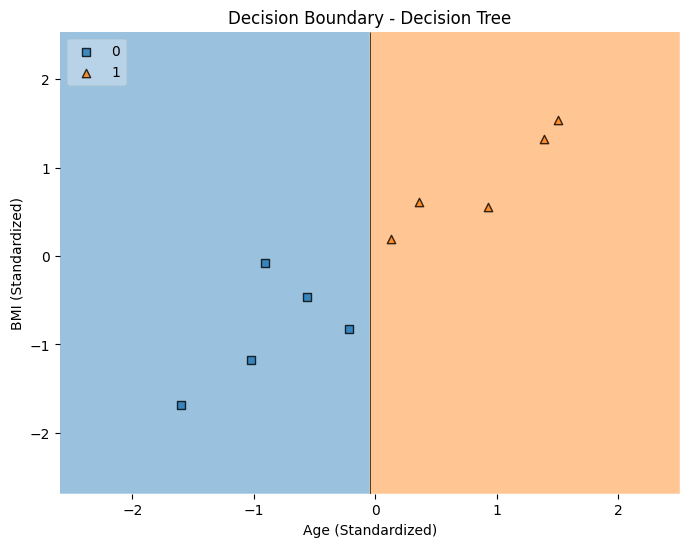

In [35]:
from mlxtend.plotting import plot_decision_regions

X_train_vis = X_train[:, :2]
X_test_vis = X_test[:, :2]

dt_model_vis = DecisionTreeClassifier(random_state=42)
dt_model_vis.fit(X_train_vis, y_train)

plt.figure(figsize=(8,6))
plot_decision_regions(X_train_vis, y_train.values, clf=dt_model_vis, legend=2)
plt.xlabel("Age (Standardized)")
plt.ylabel("BMI (Standardized)")
plt.title("Decision Boundary - Decision Tree")
plt.show()

In [36]:
# from sklearn.tree import DecisionTreeRegressor

# X_train = np.array([[45], [50], [39], [60], [33], [55], [42], [48], [59], [38]])
# y_train = np.array([90, 160, 105, 180, 85, 150, 95, 145, 175, 100])

# regressor = DecisionTreeRegressor(random_state=0)
# regressor.fit(X_train, y_train)

# X_grid = np.arange(min(X_train), max(X_train), 0.01)
# X_grid = X_grid.reshape(len(X_grid), 1)

# plt.scatter(X_train, y_train, color='red', label="Data Asli")
# plt.plot(X_grid, regressor.predict(X_grid), color='blue', label="Decision Tree Prediction")

# plt.title('Decision Tree Regression')
# plt.xlabel('Age')
# plt.ylabel('Glucose')
# plt.legend()
# plt.show()

## Support Vector Machine (SVM)

### Creating Model (Initialize)

In [37]:
# svm_model = SVC(kernel='linear', random_state=42)
# svm_model.fit(X_train, y_train)
# y_pred_svm = svm_model.predict(X_test)

In [55]:
class SVMManual:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)

In [56]:
svm_manual = SVMManual(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm_manual.fit(X_train, y_train)

y_pred_manual = svm_manual.predict(X_test)

### Model Evaluation

In [57]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

### Print Result

In [58]:
print(f"📌 Support Vector Machine (SVM):")
print(f"   ✅ Akurasi: {accuracy_svm:.2f}")
print(f"   ✅ Precision: {precision_svm:.2f}")
print(f"   ✅ Recall: {recall_svm:.2f}")
print(f"   ✅ F1 Score: {f1_svm:.2f}")
print(f"   ✅ Mean Squared Error (MSE): {mse_svm:.2f}")
print(f"   ✅ R² Score: {r2_svm:.2f}\n")

📌 Support Vector Machine (SVM):
   ✅ Akurasi: 1.00
   ✅ Precision: 1.00
   ✅ Recall: 1.00
   ✅ F1 Score: 1.00
   ✅ Mean Squared Error (MSE): 0.00
   ✅ R² Score: 1.00



### Visualization (Plotting)

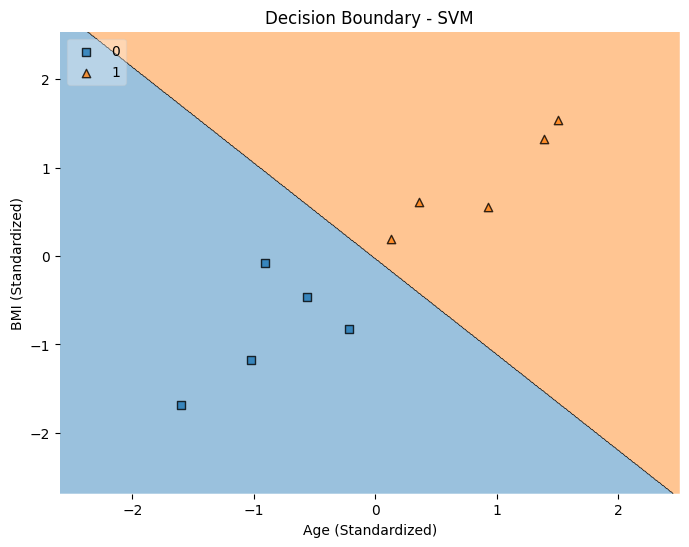

In [40]:
svm_model_vis = SVC(kernel='linear', random_state=42)
svm_model_vis.fit(X_train_vis, y_train)

plt.figure(figsize=(8,6))
plot_decision_regions(X_train_vis, y_train.values, clf=svm_model_vis, legend=2)
plt.xlabel("Age (Standardized)")
plt.ylabel("BMI (Standardized)")
plt.title("Decision Boundary - SVM")
plt.show()